In [37]:
import pandas as pd

# Load the electricity_cleaned.csv file
electricity_df = pd.read_csv('electricity.csv')

# Preview the data
electricity_df.head()


,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


In [38]:
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 1579 entries, timestamp to Mouse_science_Micheal
dtypes: float64(1578), object(1)
memory usage: 211.3+ MB


In [39]:
# Percentage of missing values
missing_percentage = (electricity_df.isnull().sum() / len(electricity_df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Eagle_lodging_Garland      100.000000
Rat_public_Ulysses         100.000000
Bobcat_education_Barbra     99.373005
Bobcat_education_Seth       96.243730
Rat_education_Mac           94.795942
                              ...    
Fox_education_Kim            0.005700
Fox_education_Ollie          0.005700
Fox_office_Brandy            0.005700
Fox_education_Tamika         0.005700
Fox_office_Vicki             0.005700
Length: 1205, dtype: float64


In [40]:
# Checking for missing values in each column
missing_values = electricity_df.isnull().sum()

# printing only columns with missing values
print(missing_values[missing_values > 0])

# Total number of missing values
total_missing = electricity_df.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")


Panther_parking_Lorriane       11
Panther_lodging_Cora           11
Panther_office_Hannah          12
Panther_lodging_Hattie         12
Panther_education_Teofila      11
                             ... 
Cockatoo_education_Tyler     1428
Cockatoo_public_Shad         1431
Mouse_health_Buddy             61
Mouse_health_Modesto            4
Mouse_health_Ileana           165
Length: 1205, dtype: int64
Total missing values in the dataset: 1312095


In [41]:
total_cells = electricity_df.shape[0] * electricity_df.shape[1]

# Missing percentage of the data
missing_percentage = (1312095 / total_cells) * 100
print(f"Overall missing percentage: {missing_percentage:.2f}%")



Overall missing percentage: 4.74%


In [42]:
# Interpolate missing values for all buildings
electricity_df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

# Reviewing whether everything is now filled
print("Remaining missing values after interpolation:", electricity_df.isnull().sum().sum())


<ipython-input-42-9915218e2629>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  electricity_df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)


Remaining missing values after interpolation: 423517


In [43]:
# Interpolating only short gaps first (eg: max 6 hours of missing data)
electricity_df.interpolate(method='linear', limit=6, limit_direction='forward', axis=0, inplace=True)


<ipython-input-43-6e073adbf8dd>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  electricity_df.interpolate(method='linear', limit=6, limit_direction='forward', axis=0, inplace=True)


In [44]:
# Checking the remaining missing values by column
still_missing = electricity_df.isnull().sum()

# Filter buildings with more missing values
threshold = len(electricity_df) * 0.3  # taking 30% threshold
buildings_to_drop = still_missing[still_missing > threshold].index

print("Buildings to consider dropping due to excessive missing data:", buildings_to_drop)


Buildings to consider dropping due to excessive missing data: Index(['Fox_education_Maureen', 'Rat_public_Ulysses', 'Rat_education_Jeanne',
       'Bear_parking_Bridget', 'Bear_assembly_Danial', 'Bear_education_Carlo',
       'Bear_assembly_Harry', 'Peacock_assembly_Mamie',
       'Peacock_education_Weldon', 'Peacock_education_Bianca',
       'Peacock_education_Karl', 'Peacock_office_Naomi',
       'Peacock_public_Linda', 'Peacock_office_Jonathon',
       'Peacock_office_Glenn', 'Peacock_education_Lucie',
       'Bobcat_education_Seth', 'Bobcat_education_Barbra',
       'Swan_unknown_Rocco', 'Swan_unknown_Bette', 'Swan_unknown_Allison',
       'Swan_unknown_Christoper', 'Swan_unknown_Jerold',
       'Swan_unknown_Valeria', 'Swan_unknown_Isaiah', 'Swan_unknown_Esteban',
       'Swan_unknown_Wendy', 'Swan_unknown_Douglas', 'Swan_unknown_Rudy',
       'Swan_unknown_Noelia', 'Swan_unknown_Raquel', 'Swan_unknown_Tom',
       'Swan_unknown_Ike', 'Swan_unknown_Reyna', 'Swan_unknown_Andres',
 

In [45]:
# Drop those columns (buildings)
# We excluded these buildings due to more than 30% missing values. This ensures more reliable modelling.
electricity_df.drop(columns=buildings_to_drop, inplace=True)

In [46]:
# Forward fill small remaining gaps (max 3 consecutive values)
electricity_df.fillna(method='ffill', limit=3, inplace=True)

# Then backward fill short gaps at the start
electricity_df.fillna(method='bfill', limit=3, inplace=True)

# Final check
print("Final missing values:", electricity_df.isnull().sum().sum())


<ipython-input-46-0c4926c3e2e7>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_df.fillna(method='ffill', limit=3, inplace=True)
<ipython-input-46-0c4926c3e2e7>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_df.fillna(method='bfill', limit=3, inplace=True)


Final missing values: 32242


In [47]:
# Total cells after dropping some buildings
total_cells_after_drop = electricity_df.shape[0] * electricity_df.shape[1]
missing_percentage_remaining = (255228 / total_cells_after_drop) * 100

print(f"Remaining missing percentage: {missing_percentage_remaining:.2f}%")


Remaining missing percentage: 0.95%


In [48]:
# Forward fill for remaining gaps
electricity_df.fillna(method='ffill', inplace=True)

# Then backward fill in case there are still gaps at the start
electricity_df.fillna(method='bfill', inplace=True)

# Final check
print("Final missing values after forward/backward fill:", electricity_df.isnull().sum().sum())


<ipython-input-48-dd6aae26b5cf>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_df.fillna(method='ffill', inplace=True)
<ipython-input-48-dd6aae26b5cf>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_df.fillna(method='bfill', inplace=True)


Final missing values after forward/backward fill: 0


In [49]:
print("Final missing values:", electricity_df.isnull().sum().sum())


Final missing values: 0


# **EDA**

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



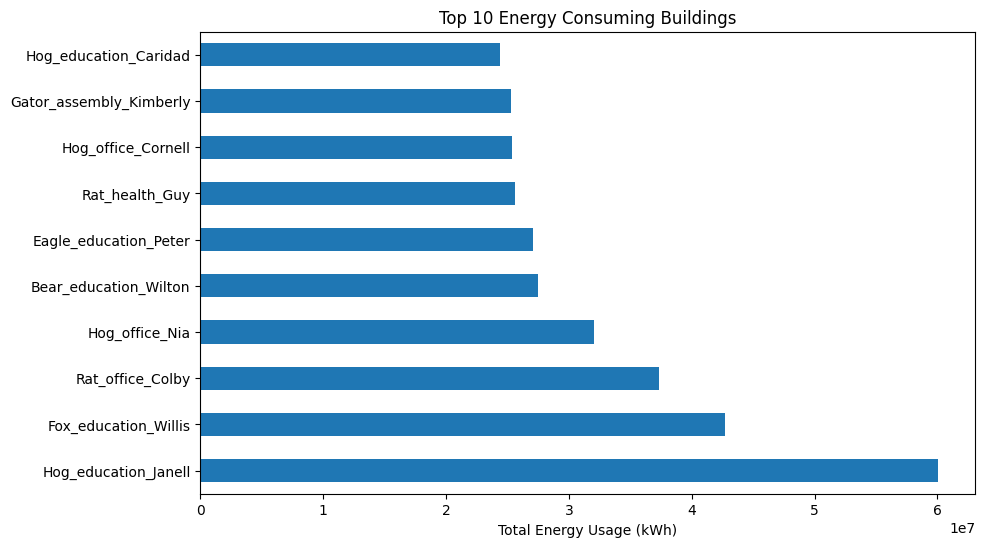

In [51]:
building_totals = electricity_df.drop(columns=['timestamp']).sum().sort_values(ascending=False)

# Plot top 10 energy-consuming buildings
building_totals.head(10).plot(kind='barh', title='Top 10 Energy Consuming Buildings', figsize=(10,6))
plt.xlabel('Total Energy Usage (kWh)')
plt.show()


In [52]:
# Convert timestamp to datetime
electricity_df['timestamp'] = pd.to_datetime(electricity_df['timestamp'])

electricity_df['month'] = electricity_df['timestamp'].dt.month


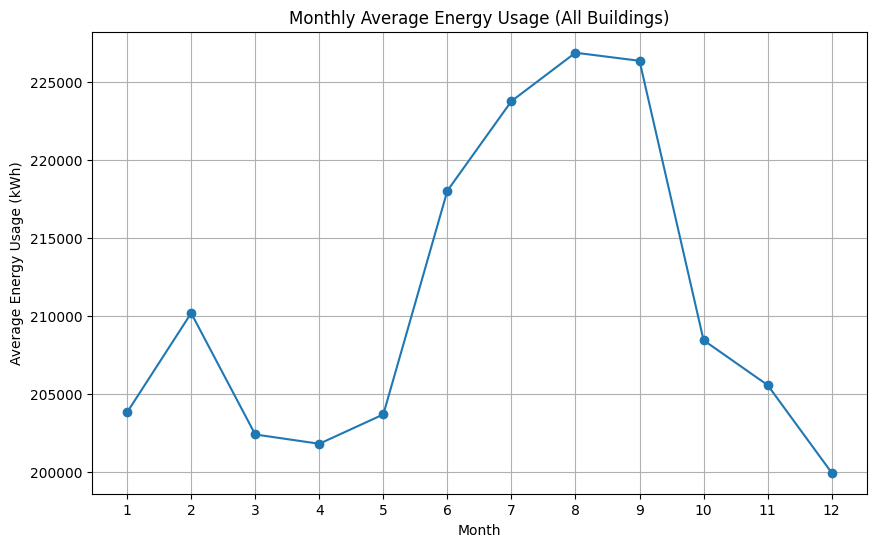

In [53]:
# Drop timestamp and month to calculate total energy at each time point
total_energy = electricity_df.drop(columns=['timestamp', 'month']).sum(axis=1)

# Creating a DataFrame to hold total energy and month
monthly_df = pd.DataFrame({'month': electricity_df['month'], 'total_energy': total_energy})

# average energy by month
monthly_avg = monthly_df.groupby('month')['total_energy'].mean()

# Plot of the monthly average energy usage
monthly_avg.plot(kind='line', marker='o', figsize=(10,6), title='Monthly Average Energy Usage (All Buildings)')
plt.xlabel('Month')
plt.ylabel('Average Energy Usage (kWh)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


In [54]:
# Extract year and month
electricity_df['year'] = electricity_df['timestamp'].dt.year
electricity_df['month'] = electricity_df['timestamp'].dt.month

# Calculate total energy across all buildings at each time point
total_energy = electricity_df.drop(columns=['timestamp', 'month', 'year']).sum(axis=1)

# Add total energy to the DataFrame
electricity_df['total_energy'] = total_energy

# Grouping by year and month to get monthly averages per year
monthly_avg_by_year = electricity_df.groupby(['year', 'month'])['total_energy'].mean().reset_index()


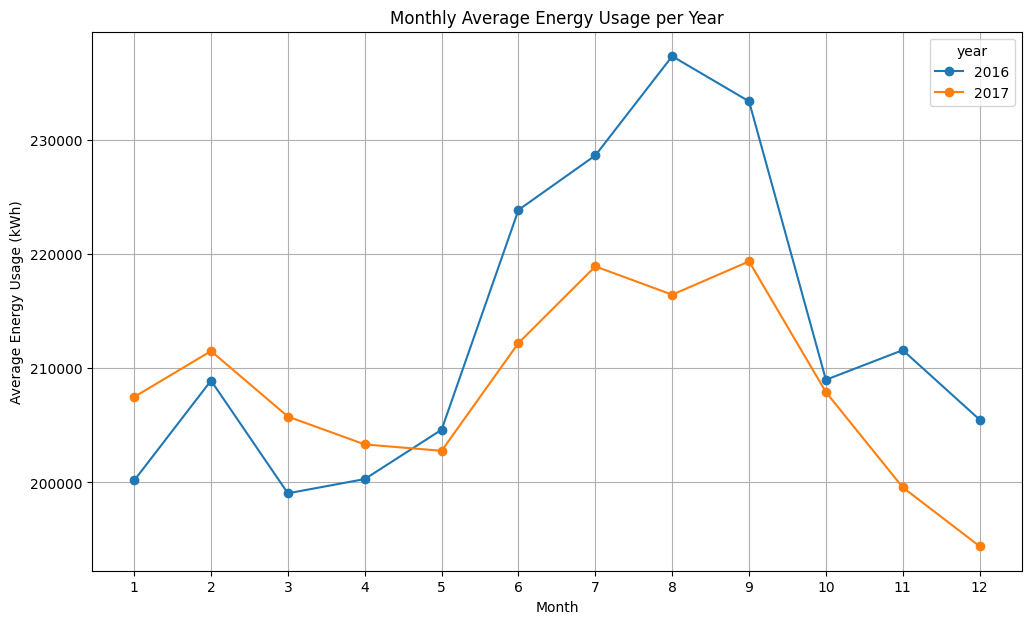

In [56]:
# Pivot data for easier plotting
monthly_pivot = monthly_avg_by_year.pivot(index='month', columns='year', values='total_energy')

# Plot of monthly trends for each year
monthly_pivot.plot(marker='o', figsize=(12, 7), title='Monthly Average Energy Usage per Year')
plt.xlabel('Month')
plt.ylabel('Average Energy Usage (kWh)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


In [57]:
from scipy.stats import zscore

# Compute z-scores for total energy
electricity_df['z_score'] = zscore(electricity_df['total_energy'])

# Identify anomalies (|z| > 3)
anomalies_df = electricity_df[abs(electricity_df['z_score']) > 3]

# Count anomalies
num_anomalies = anomalies_df.shape[0]
print(f"Number of anomalies detected: {num_anomalies}")


Number of anomalies detected: 22


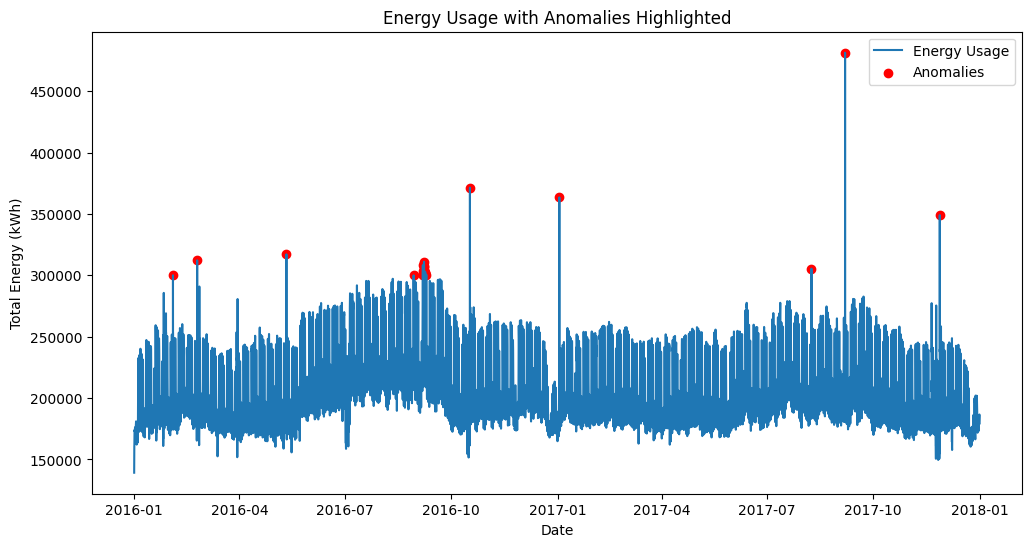

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(electricity_df['timestamp'], electricity_df['total_energy'], label='Energy Usage')
plt.scatter(anomalies_df['timestamp'], anomalies_df['total_energy'], color='red', label='Anomalies')
plt.title('Energy Usage with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Energy (kWh)')
plt.legend()
plt.show()



In [59]:
# Ensure anomalies are flagged
electricity_df['z_score'] = zscore(electricity_df['total_energy'])
electricity_df['is_anomaly'] = (abs(electricity_df['z_score']) > 3).astype(int)

# Exclude anomalies
clean_df_for_modeling = electricity_df[electricity_df['is_anomaly'] == 0].copy()

# Confirm number of rows after removal
print(f"Rows after removing 18 anomalies: {clean_df_for_modeling.shape[0]}")


Rows after removing 18 anomalies: 17522


In [60]:
# Save the full cleaned dataset without anomalies
clean_df_for_modeling.to_csv('cleaned_electricity.csv', index=False)




In [61]:
# Reloading the cleaned dataset
electricity_df = pd.read_csv('cleaned_electricity.csv')

# Ensuring timestamp is datetime
electricity_df['timestamp'] = pd.to_datetime(electricity_df['timestamp'])

print(electricity_df.shape)
print(electricity_df.columns[:5])


(17522, 1543)
Index(['timestamp', 'Panther_parking_Lorriane', 'Panther_lodging_Cora',
       'Panther_office_Hannah', 'Panther_lodging_Hattie'],
      dtype='object')


In [63]:
# Identifying building columns (exclude non-building columns)
non_building_columns = ['timestamp', 'month', 'hour', 'total_energy', 'total_energy_lag1', 'rolling_mean_3', 'z_score', 'is_anomaly']
building_columns = [col for col in electricity_df.columns if col not in non_building_columns]


In [64]:
# Creating a DataFrame for building information
building_info_df = pd.DataFrame({'building': building_columns})
building_info_df['Location'] = building_info_df['building'].str.split('_').str[0]
building_info_df['Building Type'] = building_info_df['building'].str.split('_').str[1]

# Check a few rows
print(building_info_df.head())


                    building Location Building Type
0   Panther_parking_Lorriane  Panther       parking
1       Panther_lodging_Cora  Panther       lodging
2      Panther_office_Hannah  Panther        office
3     Panther_lodging_Hattie  Panther       lodging
4  Panther_education_Teofila  Panther     education


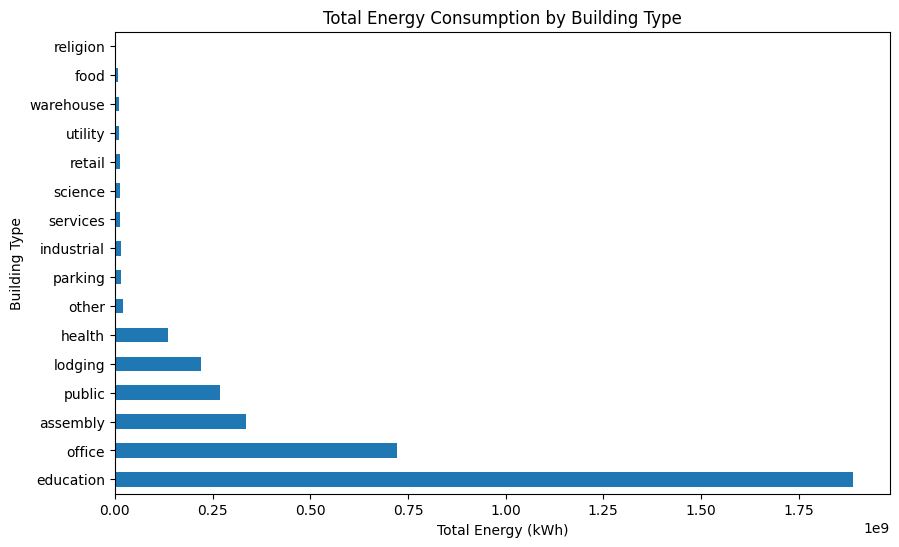

In [65]:
# Total energy per building across all timestamps
total_energy_per_building = electricity_df[building_columns].sum()

# Map total energy into building_info_df
building_info_df['Total Energy'] = building_info_df['building'].map(total_energy_per_building)

# Group by Building Type to analyze
energy_by_type = building_info_df.groupby('Building Type')['Total Energy'].sum().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt

energy_by_type.plot(kind='barh', figsize=(10,6), title='Total Energy Consumption by Building Type')
plt.xlabel('Total Energy (kWh)')
plt.ylabel('Building Type')
plt.show()


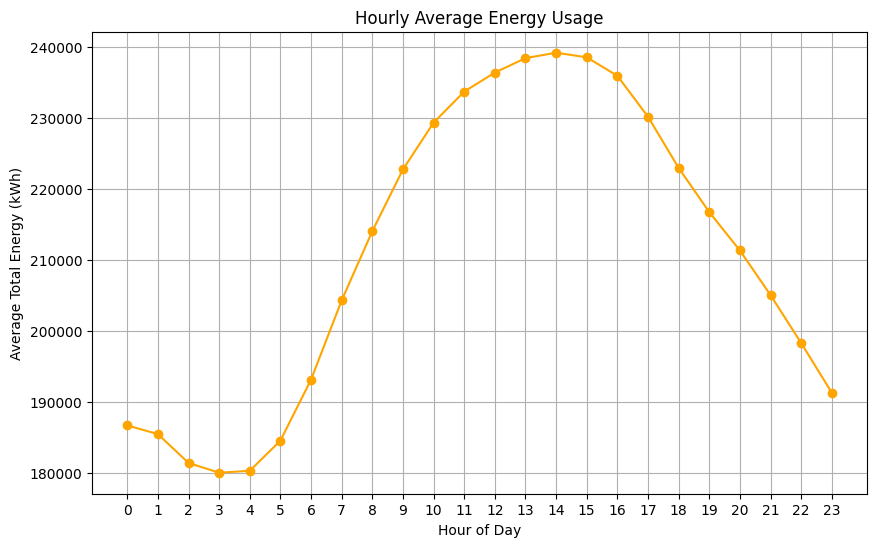

In [66]:
# Extract hour from timestamp
electricity_df['hour'] = electricity_df['timestamp'].dt.hour

# Calculate hourly average energy usage
hourly_avg_energy = electricity_df.groupby('hour')['total_energy'].mean()

# Plot hourly average energy usage
plt.figure(figsize=(10,6))
hourly_avg_energy.plot(kind='line', marker='o', color='orange')
plt.title('Hourly Average Energy Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total Energy (kWh)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


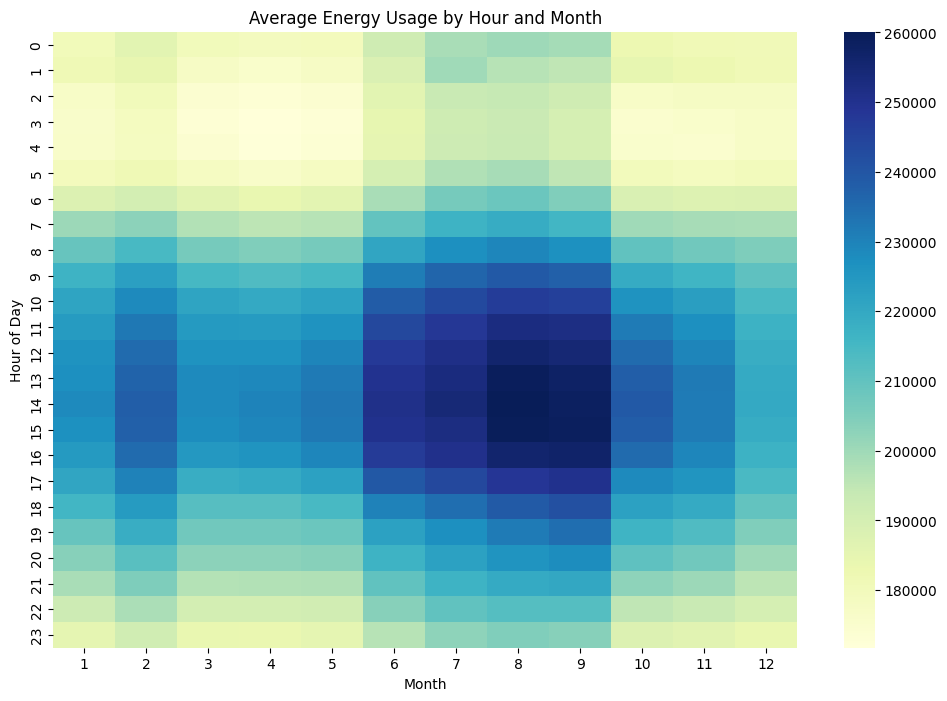

In [67]:
# Group by both month and hour for a heatmap view
pivot_table = electricity_df.pivot_table(values='total_energy', index='hour', columns='month', aggfunc='mean')

import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title('Average Energy Usage by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.show()


1. Time of Day Trends:
Peak energy usage happens between 10 AM to 5 PM, especially from noon to 3 PM.
Lowest consumption is during night hours (midnight to 6 AM), as expected.

2. Seasonal Trends:
July, August, and September (Months 7, 8, 9) show darker blue shades, indicating higher average energy usage.
Winter months (January, February, December) show lighter shades, meaning lower consumption.

3. Combined Seasonality + Time of Day Effect:
During summer months, energy usage is consistently higher during working hours (possibly due to cooling demands).

There's a strong peak in August afternoons, with energy usage reaching the highest values (~520,000 kWh average at peak).
Even in non-summer months, there's a regular daily cycle, but summer intensifies it.

In [68]:
# Extract weekday info
electricity_df['weekday'] = electricity_df['timestamp'].dt.weekday
electricity_df['is_weekend'] = electricity_df['weekday'] >= 5  # Saturday (5) and Sunday (6)

building_columns = [col for col in electricity_df.columns if col not in ['timestamp', 'month', 'hour', 'total_energy', 'total_energy_lag1', 'rolling_mean_3', 'z_score', 'is_anomaly', 'weekday', 'is_weekend']]


In [69]:
# Splitting the data into weekday and weekend
weekday_data = electricity_df[electricity_df['is_weekend'] == False]
weekend_data = electricity_df[electricity_df['is_weekend'] == True]

# Total energy per building during weekdays
weekday_energy = weekday_data[building_columns].sum()

# Total energy per building during weekends
weekend_energy = weekend_data[building_columns].sum()


In [70]:
# Creating a  DataFrame for building info again
building_info_df = pd.DataFrame({'building': building_columns})
building_info_df['Location'] = building_info_df['building'].str.split('_').str[0]
building_info_df['Building Type'] = building_info_df['building'].str.split('_').str[1]

# Add weekday and weekend energy
building_info_df['Weekday Energy'] = building_info_df['building'].map(weekday_energy)
building_info_df['Weekend Energy'] = building_info_df['building'].map(weekend_energy)


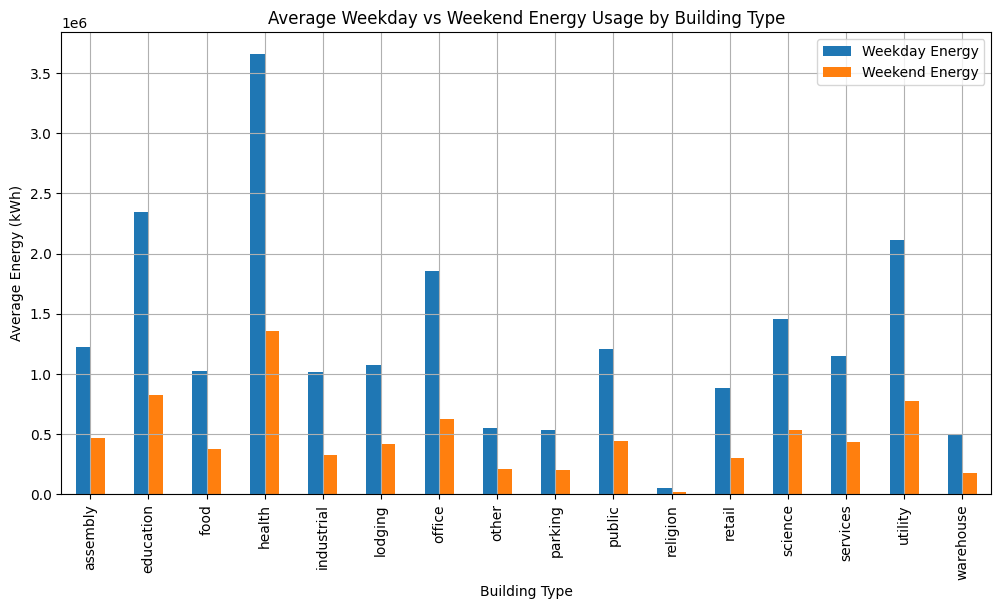

In [71]:
# Average energy per building type
energy_type_grouped = building_info_df.groupby('Building Type')[['Weekday Energy', 'Weekend Energy']].mean()

# Plot
energy_type_grouped.plot(kind='bar', figsize=(12,6), title='Average Weekday vs Weekend Energy Usage by Building Type')
plt.ylabel('Average Energy (kWh)')
plt.grid(True)
plt.show()


In [73]:
# Ratio of weekday and Weekend energy used
energy_type_grouped['Weekend/Weekday Ratio'] = energy_type_grouped['Weekend Energy'] / energy_type_grouped['Weekday Energy']
print(energy_type_grouped.sort_values(by='Weekend/Weekday Ratio', ascending=False))


               Weekday Energy  Weekend Energy  Weekend/Weekday Ratio
Building Type                                                       
lodging          1.071135e+06    4.185146e+05               0.390721
religion         5.371583e+04    2.082146e+04               0.387622
other            5.458761e+05    2.098757e+05               0.384475
assembly         1.222864e+06    4.633111e+05               0.378874
parking          5.324996e+05    2.000267e+05               0.375637
services         1.150045e+06    4.297965e+05               0.373721
health           3.657901e+06    1.358958e+06               0.371513
science          1.453995e+06    5.332102e+05               0.366721
public           1.203588e+06    4.386136e+05               0.364422
utility          2.114306e+06    7.703161e+05               0.364335
food             1.025764e+06    3.714254e+05               0.362096
warehouse        4.940328e+05    1.745463e+05               0.353309
education        2.348971e+06    8

### The insights from EDA are mentioned in the Data Masters Challenge Business Report uploaded on Github.